In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [139]:
train = pd.read_csv('dataset/train.csv')
test= pd.read_csv('dataset/test.csv')
train.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.82,-99.00,41.72,-0.90,82.41,42.52,2563.12,76.67,...,nan,239.84,2730.31,42.08,BA,Medium,2.22,0.31,24.28,6.77
1,WM_698,2018-11-05 10:13:20,241.83,27.76,-99.00,-99.00,44.10,46.26,2372.38,78.13,...,nan,337.94,1780.21,107.89,A2,Medium,4.21,0.45,27.26,5.97
2,WM_39146,2019-09-14 14:03:20,95.48,nan,41.86,12.65,42.32,42.88,1657.17,67.65,...,45.03,227.85,1666.05,-42.93,ABC,Medium,2.72,0.30,27.37,2.87
3,WM_6757,2018-12-25 15:33:20,238.82,-99.00,45.44,15.12,44.76,47.28,2888.13,95.39,...,44.83,492.08,1964.50,42.74,ABC,NaN,4.86,0.37,24.29,14.85
4,WM_21521,2019-05-04 03:13:20,10.72,nan,41.98,1.72,-17.62,43.47,781.70,37.42,...,-99.00,259.27,1177.52,13.39,AAA,Medium,nan,0.45,27.97,3.52


In [140]:
train.dtypes

tracking_id                        object
datetime                           object
wind_speed(m/s)                   float64
atmospheric_temperature(°C)       float64
shaft_temperature(°C)             float64
blades_angle(°)                   float64
gearbox_temperature(°C)           float64
engine_temperature(°C)            float64
motor_torque(N-m)                 float64
generator_temperature(°C)         float64
atmospheric_pressure(Pascal)      float64
area_temperature(°C)              float64
windmill_body_temperature(°C)     float64
wind_direction(°)                 float64
resistance(ohm)                   float64
rotor_torque(N-m)                 float64
turbine_status                     object
cloud_level                        object
blade_length(m)                   float64
blade_breadth(m)                  float64
windmill_height(m)                float64
windmill_generated_power(kW/h)    float64
dtype: object

# Deal with NaN Values:

In [141]:
train.isnull().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

### Categorical Features

In [142]:
# Function to impute most occured category and add importance vairable
def impute_categorical(DataFrame,ColName):
    #1. add new column and replace if category is null then 1 else 0
    DataFrame[ColName+"_Imputed"] =   np.where(DataFrame[ColName].isnull(),1,0)
    
    # 2. Take most occured category in that vairable (.mode())
    Mode_Category = DataFrame[ColName].mode()[0]
    
    ## 2.1 Replace NAN values with most occured category in actual vairable
    DataFrame[ColName].fillna(Mode_Category,inplace=True)

In [143]:
for c in ['turbine_status','cloud_level']:
    impute_categorical(train, c)
    
# train[['turbine_status','turbine_status_Imputed','cloud_level','cloud_level_Imputed']].head(10)

### Numerical

In [144]:
train.columns

Index(['tracking_id', 'datetime', 'wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)',
       'windmill_generated_power(kW/h)', 'turbine_status_Imputed',
       'cloud_level_Imputed'],
      dtype='object')

In [145]:
import datawig

def impute_any(output_column):
    df_train, df_test = datawig.utils.random_split(train)

    #Initialize a SimpleImputer model
    imputer = datawig.SimpleImputer(
        input_columns=['tracking_id', 'datetime', 'wind_speed(m/s)', 'shaft_temperature(°C)', 'blades_angle(°)',\
                       'gearbox_temperature(°C)', 'engine_temperature(°C)', 'motor_torque(N-m)', 'generator_temperature(°C)',\
                       'area_temperature(°C)', 'resistance(ohm)', 'rotor_torque(N-m)', 'turbine_status', 'cloud_level',\
                       'blade_length(m)', 'windmill_height(m)'], # column(s) containing information about the column we want to impute
        output_column= output_column, # the column we'd like to impute values for
        output_path = 'imputer_model' # stores model data and metrics
        )

    #Fit an imputer model on the train data
    imputer.fit(train_df=df_train, num_epochs=50)

    #Impute missing values and return original dataframe with predictions
    imputed = imputer.predict(df_test)
    return imputed
# w = impute_any('wind_speed(m/s)')

In [146]:
for i in train.columns:
    if train[i].isnull().sum()>0:
        mean = train[i].mean()
        train[i].replace(np.nan, mean, inplace=True)

In [147]:
wind = 'windmill_generated_power(kW/h)'
train.shape

(28200, 24)

In [148]:
train.isnull().sum()

tracking_id                       0
datetime                          0
wind_speed(m/s)                   0
atmospheric_temperature(°C)       0
shaft_temperature(°C)             0
blades_angle(°)                   0
gearbox_temperature(°C)           0
engine_temperature(°C)            0
motor_torque(N-m)                 0
generator_temperature(°C)         0
atmospheric_pressure(Pascal)      0
area_temperature(°C)              0
windmill_body_temperature(°C)     0
wind_direction(°)                 0
resistance(ohm)                   0
rotor_torque(N-m)                 0
turbine_status                    0
cloud_level                       0
blade_length(m)                   0
blade_breadth(m)                  0
windmill_height(m)                0
windmill_generated_power(kW/h)    0
turbine_status_Imputed            0
cloud_level_Imputed               0
dtype: int64

In [149]:
train

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),turbine_status_Imputed,cloud_level_Imputed
0,WM_33725,2019-08-04 14:33:20,94.82,-99.00,41.72,-0.90,82.41,42.52,2563.12,76.67,...,2730.31,42.08,BA,Medium,2.22,0.31,24.28,6.77,0,0
1,WM_698,2018-11-05 10:13:20,241.83,27.76,-99.00,-99.00,44.10,46.26,2372.38,78.13,...,1780.21,107.89,A2,Medium,4.21,0.45,27.26,5.97,0,0
2,WM_39146,2019-09-14 14:03:20,95.48,0.38,41.86,12.65,42.32,42.88,1657.17,67.65,...,1666.05,-42.93,ABC,Medium,2.72,0.30,27.37,2.87,0,0
3,WM_6757,2018-12-25 15:33:20,238.82,-99.00,45.44,15.12,44.76,47.28,2888.13,95.39,...,1964.50,42.74,ABC,Low,4.86,0.37,24.29,14.85,0,1
4,WM_21521,2019-05-04 03:13:20,10.72,0.38,41.98,1.72,-17.62,43.47,781.70,37.42,...,1177.52,13.39,AAA,Medium,2.25,0.45,27.97,3.52,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,WM_7814,2019-01-02 02:43:20,94.77,23.58,45.40,5.38,-1.09,48.53,2791.60,90.90,...,1980.86,45.91,BB,Medium,2.77,0.42,24.59,9.59,0,0
28196,WM_32512,2019-07-26 12:53:20,94.20,24.03,42.07,-99.00,44.29,43.49,2207.88,72.24,...,1712.84,36.97,BB,Low,-3.25,0.46,26.05,4.52,0,0
28197,WM_5193,2018-12-12 02:13:20,94.16,28.67,45.00,9.55,49.38,44.04,2801.66,94.81,...,1951.73,88.32,D,Medium,2.25,0.38,28.53,11.10,0,0
28198,WM_12173,2019-02-03 19:13:20,95.43,26.56,48.03,3.05,81.44,44.82,2760.65,90.14,...,1968.92,47.56,BCB,Low,3.00,0.35,47.75,9.37,0,0


## Numerical Values

In [150]:
train.corr()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),turbine_status_Imputed,cloud_level_Imputed
wind_speed(m/s),1.00,0.05,0.04,-0.00,0.02,0.15,0.38,0.43,-0.11,0.20,0.03,0.04,0.24,0.15,0.01,0.00,-0.01,0.06,0.00,0.00
atmospheric_temperature(°C),0.05,1.00,0.01,0.01,0.01,0.05,0.09,0.11,-0.02,0.07,0.01,0.02,0.06,0.04,0.00,0.00,0.00,-0.00,-0.00,-0.00
shaft_temperature(°C),0.04,0.01,1.00,-0.01,0.03,0.20,0.07,0.07,-0.02,0.09,0.02,0.02,0.03,0.03,0.00,-0.01,-0.01,0.05,0.01,-0.01
blades_angle(°),-0.00,0.01,-0.01,1.00,-0.03,-0.06,-0.14,-0.04,0.01,-0.08,0.00,-0.02,-0.03,-0.05,-0.01,-0.06,0.00,-0.15,0.01,-0.00
gearbox_temperature(°C),0.02,0.01,0.03,-0.03,1.00,0.13,0.05,0.05,-0.01,0.06,0.02,0.03,0.02,0.02,-0.00,0.01,0.00,0.05,-0.00,0.00
engine_temperature(°C),0.15,0.05,0.20,-0.06,0.13,1.00,0.35,0.36,-0.06,0.34,0.09,0.13,0.21,0.14,-0.01,0.01,-0.01,0.27,-0.01,-0.00
motor_torque(N-m),0.38,0.09,0.07,-0.14,0.05,0.35,1.00,0.93,-0.20,0.47,0.03,0.19,0.51,0.39,0.00,0.05,0.00,0.50,-0.01,0.00
generator_temperature(°C),0.43,0.11,0.07,-0.04,0.05,0.36,0.93,1.00,-0.23,0.51,0.03,0.19,0.54,0.37,0.00,0.02,-0.00,0.39,-0.01,0.00
atmospheric_pressure(Pascal),-0.11,-0.02,-0.02,0.01,-0.01,-0.06,-0.20,-0.23,1.00,-0.09,-0.01,-0.02,-0.12,-0.09,0.00,0.00,0.00,-0.01,0.01,-0.00
area_temperature(°C),0.20,0.07,0.09,-0.08,0.06,0.34,0.47,0.51,-0.09,1.00,0.05,0.18,0.27,0.18,0.00,0.02,-0.01,0.38,-0.01,-0.00


In [151]:
from scipy import stats

pearson_p = []
for i in train.columns:
    if train[i].dtypes!='O':
        pearson_coef, p_value = stats.pearsonr(train[i], train[wind])
        pearson_p.append([i, pearson_coef, p_value])
pearson_p_df = pd.DataFrame(pearson_p, columns=['Numerical Features', 'Pearson Coefficient', 'p-Value']) 

In [152]:
pearson_p_final = []
for i in range(20):
    if pearson_p_df.loc[i, 'p-Value'] < 0.001:
        pearson_p_final.append(pearson_p_df.loc[i, 'Numerical Features'])
pearson_p_final

['wind_speed(m/s)',
 'shaft_temperature(°C)',
 'blades_angle(°)',
 'gearbox_temperature(°C)',
 'engine_temperature(°C)',
 'motor_torque(N-m)',
 'generator_temperature(°C)',
 'area_temperature(°C)',
 'wind_direction(°)',
 'resistance(ohm)',
 'rotor_torque(N-m)',
 'blade_breadth(m)',
 'windmill_generated_power(kW/h)']

## Categorical Variables:

<AxesSubplot:xlabel='turbine_status', ylabel='windmill_generated_power(kW/h)'>

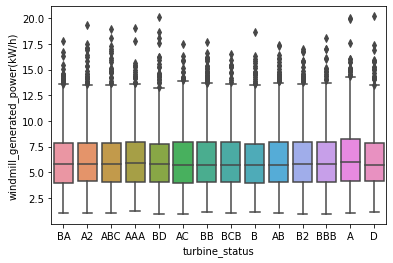

In [153]:
sns.boxplot(train['turbine_status'], train[wind])

<AxesSubplot:xlabel='cloud_level', ylabel='windmill_generated_power(kW/h)'>

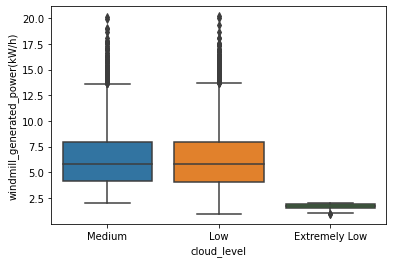

In [154]:
sns.boxplot(train['cloud_level'], train[wind])

In [155]:
cat_group = train[['turbine_status', 'cloud_level', wind]]
cat_group

,turbine_status,cloud_level,windmill_generated_power(kW/h)
0,BA,Medium,6.77
1,A2,Medium,5.97
2,ABC,Medium,2.87
3,ABC,Low,14.85
4,AAA,Medium,3.52
...,...,...,...
28195,BB,Medium,9.59
28196,BB,Low,4.52
28197,D,Medium,11.10
28198,BCB,Low,9.37


In [156]:
cat_group = cat_group.groupby(['cloud_level', 'turbine_status'], as_index=False).mean()
cat_group

,cloud_level,turbine_status,windmill_generated_power(kW/h)
0,Extremely Low,A,1.71
1,Extremely Low,A2,1.76
2,Extremely Low,AAA,1.73
3,Extremely Low,AB,1.73
4,Extremely Low,ABC,1.64
5,Extremely Low,AC,1.67
6,Extremely Low,B,1.67
7,Extremely Low,B2,1.66
8,Extremely Low,BA,1.64
9,Extremely Low,BB,1.73


In [157]:
grouped_pivot = cat_group.pivot(index='cloud_level',columns='turbine_status')
grouped_pivot

windmill_generated_power(kW/h)                                \
turbine_status                              A   A2  AAA   AB  ABC   AC    B   
cloud_level                                                                   
Extremely Low                            1.71 1.76 1.73 1.73 1.64 1.67 1.67   
Low                                      6.24 6.27 6.18 6.14 6.18 6.14 6.03   
Medium                                   6.42 6.22 6.27 6.15 6.11 6.20 6.17   

                                                   
turbine_status   B2   BA   BB  BBB  BCB   BD    D  
cloud_level                                        
Extremely Low  1.66 1.64 1.73 1.72 1.64 1.75 1.66  
Low            6.21 6.18 6.08 6.06 6.16 6.08 6.01  
Medium         6.27 6.05 6.27 6.25 6.17 6.17 6.31

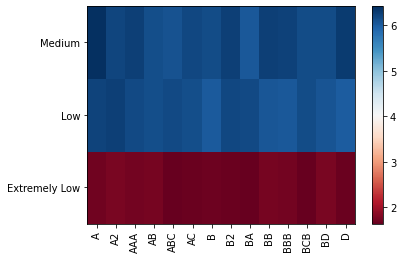

In [158]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### ANOVA

In [159]:
cat_group2=cat_group[['turbine_status', wind]].groupby(['turbine_status'])
cat_group2.head(1)

,turbine_status,windmill_generated_power(kW/h)
0,A,1.71
1,A2,1.76
2,AAA,1.73
3,AB,1.73
4,ABC,1.64
5,AC,1.67
6,B,1.67
7,B2,1.66
8,BA,1.64
9,BB,1.73


In [160]:
# turbine_status
f_val, p_val = stats.f_oneway(cat_group2.get_group('A')[wind], cat_group2.get_group('A2')[wind],\
                              cat_group2.get_group('AAA')[wind], cat_group2.get_group('AB')[wind],\
                              cat_group2.get_group('ABC')[wind], cat_group2.get_group('AC')[wind],\
                              cat_group2.get_group('B')[wind], cat_group2.get_group('B2')[wind],\
                              cat_group2.get_group('B2')[wind], cat_group2.get_group('BA')[wind],\
                              cat_group2.get_group('BB')[wind], cat_group2.get_group('BBB')[wind],\
                              cat_group2.get_group('BCB')[wind], cat_group2.get_group('BD')[wind],\
                              cat_group2.get_group('D')[wind])  
 
print( "ANOVA for turbine_status: F=", f_val, ", P =", p_val)

ANOVA for turbine_status: F= 0.000961242227005366 , P = 0.9999999999999999


In [161]:
cat_group3=cat_group[['cloud_level', wind]].groupby(['cloud_level'])
cat_group3.head(1)

,cloud_level,windmill_generated_power(kW/h)
0,Extremely Low,1.71
14,Low,6.24
28,Medium,6.42


In [162]:
# cloud_level
f_val, p_val = stats.f_oneway(cat_group3.get_group('Extremely Low')[wind], cat_group3.get_group('Low')[wind],\
                              cat_group3.get_group('Medium')[wind])  
 
print( "ANOVA for cloud_level: F=", f_val, ", P =", p_val)

ANOVA for cloud_level: F= 17131.83579977556 , P = 3.8624680348850876e-58


### So important variables we derived:
#### Numerical:
- wind_speed(m/s)
- haft_temperature(°C)
- blades_angle(°)
- gearbox_temperature(°C)
- engine_temperature(°C)
- motor_torque(N-m)
- generator_temperature(°C)
- area_temperature(°C)
- wind_direction(°)
- resistance(ohm)
- rotor_torque(N-m)
- blade_breadth(m)

#### Categorical
- cloud_level

In [163]:
# necessary functions
from sklearn.decomposition import PCA
labels = np.reshape(train[wind].to_numpy(), (28200,1))

def pca_analysis(df, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.iloc[:, :-1].values)

    pca_concatenate = np.concatenate([pca_result, labels], axis=1)
    return pca_concatenate
def make_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'pc{i}')
    col.append(wind)
    return pd.DataFrame(array, columns = col)

from sklearn.manifold import TSNE
def tsne_analysis(df, n_components):
    tsne = TSNE(n_components=n_components)
    tsne_result = tsne.fit_transform(df.iloc[:, :-1].values)

    tsne_concatenate = np.concatenate([tsne_result, labels], axis=1)
    return tsne_concatenate
def tsne_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'tsne{i}')
    col.append(wind)
    return pd.DataFrame(array, columns = col)

# def get_xy(df):
#     if df.shape==37:
#         X = df.drop(wind, axis=1)
#     else:
#         X = df
#     y = train[wind].copy()
#     return X, y
def get_xy(df):
    X = df.drop(wind, axis=1)
    y = train[wind].copy()
    return X, y

# Lazypredict

In [164]:
import lazypredict

from sklearn.model_selection import ShuffleSplit, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

from sklearn.metrics import accuracy_score, r2_score
from lazypredict.Supervised import LazyClassifier, LazyRegressor

lazy =  LazyRegressor(predictions=True)

# test.csv

In [172]:
for c in ['turbine_status','cloud_level']:
    impute_categorical(test, c)

for i in test.columns:
    if test[i].isnull().sum()>0:
        mean = test[i].mean()
        test[i].replace(np.nan, mean, inplace=True)
test

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),turbine_status_Imputed,cloud_level_Imputed
0,WM_19817,2019-04-17 08:53:20,94.32,17.64,89.71,51.15,40.46,39.59,1073.20,66.83,...,445.98,1664.22,21.91,BA,Medium,3.19,0.40,25.57,0,0
1,WM_18723,2019-03-30 07:43:20,10.09,13.98,43.27,46.52,40.03,41.18,517.44,37.28,...,499.60,1165.11,-35.05,A,Medium,3.02,0.44,24.37,0,0
2,WM_34552,2019-08-10 11:33:20,347.15,31.42,41.08,26.93,43.11,43.44,1480.72,70.01,...,245.43,1667.72,27.20,B2,Medium,2.61,0.39,27.65,0,0
3,WM_28570,2019-06-26 03:53:20,24.47,-99.00,14.38,66.51,13.74,15.58,887.98,41.45,...,308.38,1329.74,15.25,BBB,Low,2.87,0.45,24.19,0,0
4,WM_36934,2019-08-27 16:43:20,97.00,33.28,41.41,1.84,121.57,43.93,2053.92,68.01,...,442.43,691.41,34.26,A,Low,3.55,0.37,4.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,-15.04,18.52,43.55,-1.09,44.55,44.49,2424.37,75.85,...,509.80,1798.14,-14.37,BB,Medium,3.29,0.41,20.89,1,0
12082,WM_1630,2018-11-12 17:33:20,97.59,-99.00,44.75,1.75,43.31,42.85,2085.63,73.09,...,345.71,1680.25,-7.06,AB,Low,2.20,0.37,24.79,0,0
12083,WM_24703,2019-05-27 11:53:20,16.19,8.11,43.25,-0.69,214.90,41.18,788.69,39.51,...,205.57,2343.17,12.33,BA,Low,3.73,0.46,5.65,0,0
12084,WM_22893,2019-05-13 21:53:20,93.25,-99.00,43.84,-1.17,41.98,42.04,2079.86,71.48,...,260.58,1732.88,26.57,A,Medium,2.25,0.39,24.59,0,0


### More tests

In [165]:
imp0 = ['wind_speed(m/s)',
 'shaft_temperature(°C)',
 'blades_angle(°)',
 'gearbox_temperature(°C)',
 'engine_temperature(°C)',
 'motor_torque(N-m)',
 'generator_temperature(°C)',
 'area_temperature(°C)',
 'wind_direction(°)',
 'resistance(ohm)',
 'rotor_torque(N-m)',
 'blade_breadth(m)', 'cloud_level']

imp = ['motor_torque(N-m)', 'blades_angle(°)', 'atmospheric_pressure(Pascal)', 'resistance(ohm)', 'generator_temperature(°C)', 'engine_temperature(°C)']

In [166]:
from sklearn.model_selection import train_test_split
X = train[imp0]
y = train[wind]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

# Encoding
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['cloud_level'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

scaler = RobustScaler()

cols = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


# fit the model
# models, predictions = lazy.fit(X_train, X_test, y_train, y_test)


In [167]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.95,0.95,0.58,29.28
LGBMRegressor,0.95,0.95,0.59,0.67
HistGradientBoostingRegressor,0.95,0.95,0.59,1.62
XGBRegressor,0.95,0.95,0.60,3.52
ExtraTreesRegressor,0.95,0.95,0.62,9.26
BaggingRegressor,0.95,0.95,0.62,2.45
GradientBoostingRegressor,0.94,0.94,0.66,10.39
MLPRegressor,0.92,0.92,0.77,46.89
DecisionTreeRegressor,0.91,0.91,0.79,0.41


In [168]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, GradientBoostingRegressor
import xgboost as xgb


m = [RandomForestRegressor(), HistGradientBoostingRegressor(), xgb.XGBRegressor(),\
     ExtraTreesRegressor(), BaggingRegressor(), GradientBoostingRegressor()]
m[0]

RandomForestRegressor()

In [169]:
accuracy = []

X = train[imp0]
y = train[wind]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Encoding
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['cloud_level'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

scaler = RobustScaler()

cols = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

for i in m:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    score = max(0, 100 * r2_score(y_test, y_pred))
    print(i, score)
    accuracy.append([i, score])

RandomForestRegressor() 95.30798917780969
HistGradientBoostingRegressor() 95.2100152429316
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 95.08028155951578
ExtraTreesRegressor() 94.74910864759329
BaggingRegressor() 94.53548157800992
GradientBoostingRegressor() 94.03819113537902


In [189]:
X_train_final = train[imp0]
y_train_final = train[wind]
X_test_final = test[imp0]

encoder = ce.OneHotEncoder(cols=['cloud_level'])
X_train_final = encoder.fit_transform(X_train_final)
X_test_final = encoder.transform(X_test_final)

scaler = RobustScaler()
cols = X_train_final.columns
X_train_final = scaler.fit_transform(X_train_final)
X_test_final = scaler.transform(X_test_final)

X_train_final= pd.DataFrame(X_train_final, columns=[cols])
X_test_final = pd.DataFrame(X_test_final, columns=[cols])


j=6
for i in m:
    i.fit(X_train_final, y_train_final)
    y_pred_final = i.predict(X_test_final)
    y_pred_final_df = pd.DataFrame(y_pred_final, columns=[wind])

    submission = pd.concat([test[['tracking_id', 'datetime']], y_pred_final_df], axis=1)
    
    submission.to_csv(f'submission{j}_raw_{str(i)[:6]}.csv', index=False)
    j+=1
    print(f'{str(i)[:6]} Done')

Random Done
HistGr Done
XGBReg Done
ExtraT Done
Baggin Done
Gradie Done


In [188]:
str(m[2])[:6]

'XGBReg'